In [2]:
#import important libraries
import warnings
warnings.filterwarnings("ignore")

import os
import glob
import matplotlib.pyplot as plt
# Keras API
from tensorflow import keras
from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense,Dropout,Flatten
from tensorflow.keras.layers import Conv2D,MaxPooling2D,AveragePooling2D,BatchNormalization,Concatenate
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,Dense, Dropout, Activation, Flatten
#from tensorflow.keras.layers import Conv2D, MaxPooling2D,Concatenate
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.utils import to_categorical
from tensorflow.math import confusion_matrix 
import pickle
import time
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
#load the dataset from pickled files
pickle_in = open("X_BW.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("Y_BW.pickle","rb")
y = pickle.load(pickle_in)
y = to_categorical(y)

In [4]:
print(type(X))
print(X.shape)
print(y.shape)

<class 'numpy.ndarray'>
(8068, 64, 64, 1)
(8068, 5)


In [5]:
#split into train and test datasets
#X.reshape((8181,3),64,64,1)
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.75,test_size=0.25,random_state=123)
print(X_test.shape)
#print(W_test.shape)
print(y_test.shape)

(2017, 64, 64, 1)
(2017, 5)


In [6]:
from tensorflow.keras.utils import plot_model
from keras.layers.merge import concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint

Using TensorFlow backend.


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 60, 60, 128)       3328      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 20, 20, 128)       0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 20, 20, 128)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 18, 18, 32)        36896     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 9, 9, 32)          0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 9, 9, 32)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 7, 7, 64)         

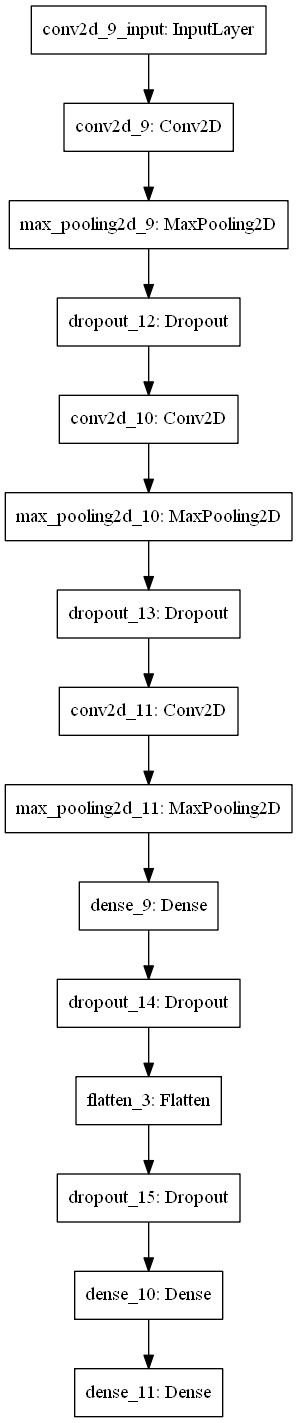

In [35]:
from tensorflow.keras.utils import plot_model
visible1 = (64,64,1)
model = Sequential()
model.add(Conv2D(128, (5, 5),input_shape=visible1,activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))   
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(128,activation='relu'))          
model.add(Dense(5,activation='softmax'))
model.summary()
plot_model(model, to_file='convolutional_neural_network.png')

In [36]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy', keras.metrics.Precision(),  keras.metrics.Recall()],
             )

In [8]:
import time
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
start = time.perf_counter()
print(y_train.shape)

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)
mc = ModelCheckpoint('best_model_BW.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)


history=model.fit(X_train, y_train, batch_size=64, epochs=100, validation_split=0.2,shuffle=1, callbacks=[es, mc], class_weight=None)

elapsed = time.perf_counter() - start
print('Elapsed %.3f seconds.' % elapsed)

(6051, 5)
Epoch 1/100
76/76 [==============================] - ETA: 0s - loss: 1.5930 - accuracy: 0.5698 - precision: 0.6947 - recall: 0.3310
Epoch 00001: val_accuracy improved from -inf to 0.69612, saving model to best_model_BW.h5
76/76 [==============================] - 53s 697ms/step - loss: 1.5930 - accuracy: 0.5698 - precision: 0.6947 - recall: 0.3310 - val_loss: 0.7419 - val_accuracy: 0.6961 - val_precision: 0.9087 - val_recall: 0.4682
Epoch 2/100
76/76 [==============================] - ETA: 0s - loss: 0.6718 - accuracy: 0.7273 - precision: 0.8072 - recall: 0.6393
Epoch 00002: val_accuracy improved from 0.69612 to 0.75970, saving model to best_model_BW.h5
76/76 [==============================] - 50s 655ms/step - loss: 0.6718 - accuracy: 0.7273 - precision: 0.8072 - recall: 0.6393 - val_loss: 0.6064 - val_accuracy: 0.7597 - val_precision: 0.8165 - val_recall: 0.6689
Epoch 3/100
76/76 [==============================] - ETA: 0s - loss: 0.5716 - accuracy: 0.7752 - precision: 0.8304 

Epoch 21/100
76/76 [==============================] - ETA: 0s - loss: 0.2176 - accuracy: 0.9184 - precision: 0.9283 - recall: 0.9116
Epoch 00021: val_accuracy did not improve from 0.92155
76/76 [==============================] - 59s 773ms/step - loss: 0.2176 - accuracy: 0.9184 - precision: 0.9283 - recall: 0.9116 - val_loss: 0.2458 - val_accuracy: 0.9083 - val_precision: 0.9237 - val_recall: 0.8902
Epoch 22/100
76/76 [==============================] - ETA: 0s - loss: 0.2130 - accuracy: 0.9192 - precision: 0.9283 - recall: 0.9099
Epoch 00022: val_accuracy did not improve from 0.92155
76/76 [==============================] - 52s 689ms/step - loss: 0.2130 - accuracy: 0.9192 - precision: 0.9283 - recall: 0.9099 - val_loss: 0.2568 - val_accuracy: 0.8993 - val_precision: 0.9072 - val_recall: 0.8960
Epoch 23/100
76/76 [==============================] - ETA: 0s - loss: 0.2058 - accuracy: 0.9194 - precision: 0.9254 - recall: 0.9126
Epoch 00023: val_accuracy did not improve from 0.92155
76/76 [=

76/76 [==============================] - ETA: 0s - loss: 0.1097 - accuracy: 0.9587 - precision: 0.9602 - recall: 0.9570
Epoch 00061: val_accuracy did not improve from 0.93311
76/76 [==============================] - 61s 798ms/step - loss: 0.1097 - accuracy: 0.9587 - precision: 0.9602 - recall: 0.9570 - val_loss: 0.2963 - val_accuracy: 0.9133 - val_precision: 0.9153 - val_recall: 0.9100
Epoch 62/100
76/76 [==============================] - ETA: 0s - loss: 0.1176 - accuracy: 0.9585 - precision: 0.9607 - recall: 0.9554
Epoch 00062: val_accuracy did not improve from 0.93311
76/76 [==============================] - 56s 739ms/step - loss: 0.1176 - accuracy: 0.9585 - precision: 0.9607 - recall: 0.9554 - val_loss: 0.3483 - val_accuracy: 0.9042 - val_precision: 0.9086 - val_recall: 0.9034
Epoch 63/100
76/76 [==============================] - ETA: 0s - loss: 0.0983 - accuracy: 0.9655 - precision: 0.9659 - recall: 0.9647
Epoch 00063: val_accuracy did not improve from 0.93311
76/76 [==============

Epoch 82/100
76/76 [==============================] - ETA: 0s - loss: 0.1098 - accuracy: 0.9612 - precision: 0.9627 - recall: 0.9591
Epoch 00082: val_accuracy did not improve from 0.93311
76/76 [==============================] - 45s 596ms/step - loss: 0.1098 - accuracy: 0.9612 - precision: 0.9627 - recall: 0.9591 - val_loss: 0.3183 - val_accuracy: 0.9108 - val_precision: 0.9189 - val_recall: 0.9075
Epoch 83/100
76/76 [==============================] - ETA: 0s - loss: 0.0818 - accuracy: 0.9707 - precision: 0.9724 - recall: 0.9696
Epoch 00083: val_accuracy did not improve from 0.93311
76/76 [==============================] - 45s 590ms/step - loss: 0.0818 - accuracy: 0.9707 - precision: 0.9724 - recall: 0.9696 - val_loss: 0.3185 - val_accuracy: 0.9199 - val_precision: 0.9244 - val_recall: 0.9182
Epoch 84/100
76/76 [==============================] - ETA: 0s - loss: 0.0846 - accuracy: 0.9696 - precision: 0.9700 - recall: 0.9684
Epoch 00084: val_accuracy did not improve from 0.93311
76/76 [=

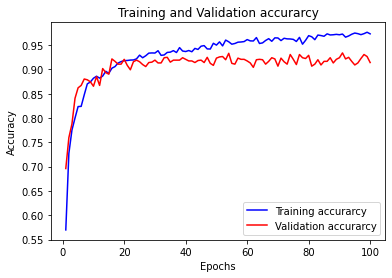

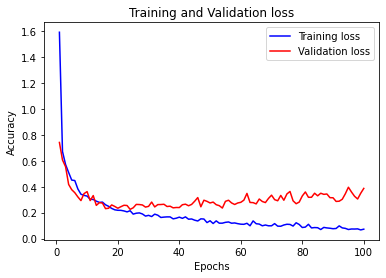

In [9]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [47]:
from tensorflow.keras.models import load_model
saved_model = load_model('best_model_BW.h5')

score,accuracy,precision,recall = saved_model.evaluate(X_test,y_test,verbose=1)
print("Test loss is {}".format(score))
print("Test accuracy is {}".format(accuracy))
print("Test Precision is {}".format(precision))
print("Test Recall is {}".format(recall))
f1 = (2*(precision*recall))/(precision+recall)
print("Test f1_score is {}".format(f1))

64/64 [==============================] - 2s 31ms/step - loss: 0.3893 - accuracy: 0.9192 - precision: 0.9191 - recall: 0.9177
Test loss is 0.38927242159843445
Test accuracy is 0.9191868901252747
Test Precision is 0.9190665483474731
Test Recall is 0.9176995754241943
Test f1_score is 0.9183825532160176


In [12]:
from tensorflow.keras.models import load_model
saved_model = load_model('best_model_BW.h5')

score,accuracy,precision,recall = saved_model.evaluate(X_train,y_train,verbose=1)
f1 = (2*(precision*recall))/(precision+recall)
print("Train loss is {}".format(score))
print("Train accuracy is {}".format(accuracy))
print("Train Precision is {}".format(precision))
print("Train Recall is {}".format(recall))
print("Train f1_score is {}".format(f1))

190/190 [==============================] - 6s 33ms/step - loss: 0.0685 - accuracy: 0.9851 - precision: 0.9854 - recall: 0.9845
Train loss is 0.068525530397892
Train accuracy is 0.9851264357566833
Train Precision is 0.9854425191879272
Train Recall is 0.9844653606414795
Train f1_score is 0.984953697558491


In [48]:
prediction = saved_model.predict(X)[:,1].tolist()
print(len(prediction))

8068


In [49]:
prediction__class = np.argmax(saved_model.predict(X), axis=-1)
print(prediction__class)

[0 0 0 ... 4 2 4]


In [50]:
import pandas as pd
df = pd.read_csv("E:/Meat_Excels/MeatCutPredictions.csv")
df["BW_Predition_100"] = prediction__class

In [ ]:
from tensorflow.keras.utils import plot_model
visible1 = (64,64,1)
model = Sequential()
model.add(Conv2D(128, (5, 5),input_shape=visible1,activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))   
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(128,activation='relu'))          
model.add(Dense(5,activation='softmax'))
model.summary()
plot_model(model, to_file='convolutional_neural_network.png')

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy', keras.metrics.Precision(),  keras.metrics.Recall()],
             )

In [13]:
import time
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
start = time.perf_counter()
print(y_train.shape)

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)
mc = ModelCheckpoint('best_model_BW_1000.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)


history=model.fit(X_train, y_train, batch_size=64, epochs=1000, validation_split=0.2,shuffle=1, callbacks=[es, mc], class_weight=None)

elapsed = time.perf_counter() - start
print('Elapsed %.3f seconds.' % elapsed)

(6051, 5)
Epoch 1/1000
76/76 [==============================] - ETA: 0s - loss: 1.7398 - accuracy: 0.5682 - precision: 0.6689 - recall: 0.4079
Epoch 00001: val_accuracy improved from -inf to 0.71346, saving model to best_model_BW_1000.h5
76/76 [==============================] - 23s 298ms/step - loss: 1.7398 - accuracy: 0.5682 - precision: 0.6689 - recall: 0.4079 - val_loss: 0.7025 - val_accuracy: 0.7135 - val_precision: 0.7609 - val_recall: 0.6177
Epoch 2/1000
76/76 [==============================] - ETA: 0s - loss: 0.6471 - accuracy: 0.7415 - precision: 0.8094 - recall: 0.6686
Epoch 00002: val_accuracy improved from 0.71346 to 0.81255, saving model to best_model_BW_1000.h5
76/76 [==============================] - 23s 308ms/step - loss: 0.6471 - accuracy: 0.7415 - precision: 0.8094 - recall: 0.6686 - val_loss: 0.5609 - val_accuracy: 0.8126 - val_precision: 0.9321 - val_recall: 0.6466
Epoch 3/1000
76/76 [==============================] - ETA: 0s - loss: 0.5696 - accuracy: 0.7785 - preci

Epoch 20/1000
76/76 [==============================] - ETA: 0s - loss: 0.2461 - accuracy: 0.9089 - precision: 0.9182 - recall: 0.8998
Epoch 00020: val_accuracy improved from 0.91660 to 0.91742, saving model to best_model_BW_1000.h5
76/76 [==============================] - 24s 316ms/step - loss: 0.2461 - accuracy: 0.9089 - precision: 0.9182 - recall: 0.8998 - val_loss: 0.2303 - val_accuracy: 0.9174 - val_precision: 0.9229 - val_recall: 0.9100
Epoch 21/1000
76/76 [==============================] - ETA: 0s - loss: 0.2317 - accuracy: 0.9155 - precision: 0.9245 - recall: 0.9062
Epoch 00021: val_accuracy did not improve from 0.91742
76/76 [==============================] - 25s 332ms/step - loss: 0.2317 - accuracy: 0.9155 - precision: 0.9245 - recall: 0.9062 - val_loss: 0.2353 - val_accuracy: 0.9116 - val_precision: 0.9222 - val_recall: 0.9009
Epoch 22/1000
76/76 [==============================] - ETA: 0s - loss: 0.2278 - accuracy: 0.9091 - precision: 0.9174 - recall: 0.9012
Epoch 00022: val_

76/76 [==============================] - ETA: 0s - loss: 0.1636 - accuracy: 0.9364 - precision: 0.9402 - recall: 0.9329
Epoch 00040: val_accuracy did not improve from 0.92320
76/76 [==============================] - 26s 345ms/step - loss: 0.1636 - accuracy: 0.9364 - precision: 0.9402 - recall: 0.9329 - val_loss: 0.2960 - val_accuracy: 0.9001 - val_precision: 0.9058 - val_recall: 0.8968
Epoch 41/1000
76/76 [==============================] - ETA: 0s - loss: 0.1692 - accuracy: 0.9324 - precision: 0.9362 - recall: 0.9275
Epoch 00041: val_accuracy did not improve from 0.92320
76/76 [==============================] - 35s 466ms/step - loss: 0.1692 - accuracy: 0.9324 - precision: 0.9362 - recall: 0.9275 - val_loss: 0.2649 - val_accuracy: 0.9149 - val_precision: 0.9184 - val_recall: 0.9108
Epoch 42/1000
76/76 [==============================] - ETA: 0s - loss: 0.1726 - accuracy: 0.9374 - precision: 0.9438 - recall: 0.9333
Epoch 00042: val_accuracy did not improve from 0.92320
76/76 [============

Epoch 81/1000
76/76 [==============================] - ETA: 0s - loss: 0.1130 - accuracy: 0.9576 - precision: 0.9588 - recall: 0.9558
Epoch 00081: val_accuracy did not improve from 0.93394
76/76 [==============================] - 25s 323ms/step - loss: 0.1130 - accuracy: 0.9576 - precision: 0.9588 - recall: 0.9558 - val_loss: 0.3013 - val_accuracy: 0.9232 - val_precision: 0.9254 - val_recall: 0.9224
Epoch 82/1000
76/76 [==============================] - ETA: 0s - loss: 0.1090 - accuracy: 0.9610 - precision: 0.9625 - recall: 0.9587
Epoch 00082: val_accuracy did not improve from 0.93394
76/76 [==============================] - 24s 320ms/step - loss: 0.1090 - accuracy: 0.9610 - precision: 0.9625 - recall: 0.9587 - val_loss: 0.3012 - val_accuracy: 0.9240 - val_precision: 0.9260 - val_recall: 0.9199
Epoch 83/1000
76/76 [==============================] - ETA: 0s - loss: 0.1155 - accuracy: 0.9585 - precision: 0.9600 - recall: 0.9574
Epoch 00083: val_accuracy did not improve from 0.93394
76/76

76/76 [==============================] - ETA: 0s - loss: 0.0804 - accuracy: 0.9694 - precision: 0.9702 - recall: 0.9688
Epoch 00121: val_accuracy did not improve from 0.93394
76/76 [==============================] - 25s 326ms/step - loss: 0.0804 - accuracy: 0.9694 - precision: 0.9702 - recall: 0.9688 - val_loss: 0.3612 - val_accuracy: 0.9158 - val_precision: 0.9194 - val_recall: 0.9141
Epoch 122/1000
76/76 [==============================] - ETA: 0s - loss: 0.0772 - accuracy: 0.9717 - precision: 0.9725 - recall: 0.9715
Epoch 00122: val_accuracy did not improve from 0.93394
76/76 [==============================] - 27s 351ms/step - loss: 0.0772 - accuracy: 0.9717 - precision: 0.9725 - recall: 0.9715 - val_loss: 0.3756 - val_accuracy: 0.9141 - val_precision: 0.9163 - val_recall: 0.9133
Epoch 123/1000
76/76 [==============================] - ETA: 0s - loss: 0.0734 - accuracy: 0.9740 - precision: 0.9741 - recall: 0.9727
Epoch 00123: val_accuracy did not improve from 0.93394
76/76 [==========

76/76 [==============================] - ETA: 0s - loss: 0.0622 - accuracy: 0.9791 - precision: 0.9803 - recall: 0.9785
Epoch 00161: val_accuracy did not improve from 0.93394
76/76 [==============================] - 24s 318ms/step - loss: 0.0622 - accuracy: 0.9791 - precision: 0.9803 - recall: 0.9785 - val_loss: 0.4015 - val_accuracy: 0.9158 - val_precision: 0.9195 - val_recall: 0.9149
Epoch 162/1000
76/76 [==============================] - ETA: 0s - loss: 0.0424 - accuracy: 0.9855 - precision: 0.9861 - recall: 0.9853
Epoch 00162: val_accuracy did not improve from 0.93394
76/76 [==============================] - 24s 320ms/step - loss: 0.0424 - accuracy: 0.9855 - precision: 0.9861 - recall: 0.9853 - val_loss: 0.4653 - val_accuracy: 0.9191 - val_precision: 0.9190 - val_recall: 0.9182
Epoch 163/1000
76/76 [==============================] - ETA: 0s - loss: 0.0412 - accuracy: 0.9862 - precision: 0.9868 - recall: 0.9860
Epoch 00163: val_accuracy did not improve from 0.93394
76/76 [==========

76/76 [==============================] - ETA: 0s - loss: 0.0513 - accuracy: 0.9822 - precision: 0.9828 - recall: 0.9820
Epoch 00201: val_accuracy did not improve from 0.93394
76/76 [==============================] - 24s 318ms/step - loss: 0.0513 - accuracy: 0.9822 - precision: 0.9828 - recall: 0.9820 - val_loss: 0.4801 - val_accuracy: 0.9224 - val_precision: 0.9252 - val_recall: 0.9199
Epoch 202/1000
76/76 [==============================] - ETA: 0s - loss: 0.0535 - accuracy: 0.9822 - precision: 0.9822 - recall: 0.9814
Epoch 00202: val_accuracy did not improve from 0.93394
76/76 [==============================] - 24s 318ms/step - loss: 0.0535 - accuracy: 0.9822 - precision: 0.9822 - recall: 0.9814 - val_loss: 0.3951 - val_accuracy: 0.9199 - val_precision: 0.9229 - val_recall: 0.9191
Epoch 203/1000
76/76 [==============================] - ETA: 0s - loss: 0.0383 - accuracy: 0.9872 - precision: 0.9874 - recall: 0.9870
Epoch 00203: val_accuracy did not improve from 0.93394
76/76 [==========

76/76 [==============================] - ETA: 0s - loss: 0.0377 - accuracy: 0.9876 - precision: 0.9884 - recall: 0.9874
Epoch 00241: val_accuracy did not improve from 0.93394
76/76 [==============================] - 30s 399ms/step - loss: 0.0377 - accuracy: 0.9876 - precision: 0.9884 - recall: 0.9874 - val_loss: 0.5198 - val_accuracy: 0.9232 - val_precision: 0.9240 - val_recall: 0.9232
Epoch 242/1000
76/76 [==============================] - ETA: 0s - loss: 0.0532 - accuracy: 0.9853 - precision: 0.9855 - recall: 0.9851
Epoch 00242: val_accuracy did not improve from 0.93394
76/76 [==============================] - 30s 395ms/step - loss: 0.0532 - accuracy: 0.9853 - precision: 0.9855 - recall: 0.9851 - val_loss: 0.4867 - val_accuracy: 0.9207 - val_precision: 0.9214 - val_recall: 0.9191
Epoch 243/1000
76/76 [==============================] - ETA: 0s - loss: 0.0427 - accuracy: 0.9880 - precision: 0.9884 - recall: 0.9876
Epoch 00243: val_accuracy did not improve from 0.93394
76/76 [==========

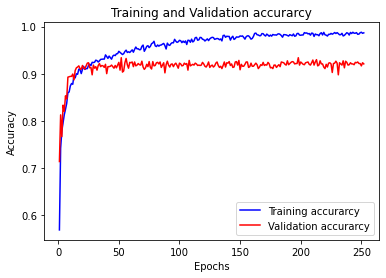

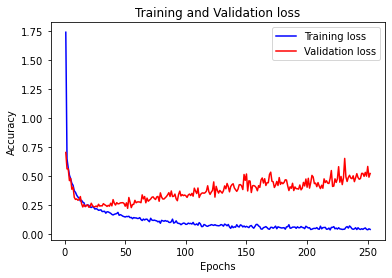

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [8]:
from tensorflow.keras.models import load_model
saved_model = load_model('best_model_BW_1000.h5')

score,accuracy,precision,recall = saved_model.evaluate(X_test,y_test,verbose=1)
print("Test loss is {}".format(score))
print("Test accuracy is {}".format(accuracy))
print("Test Precision is {}".format(precision))
print("Test Recall is {}".format(recall))
f1 = (2*(precision*recall))/(precision+recall)
print("Test f1_score is {}".format(f1))

64/64 [==============================] - 3s 51ms/step - loss: 0.2579 - accuracy: 0.9152 - precision: 0.9217 - recall: 0.9103
Test loss is 0.2579262852668762
Test accuracy is 0.9152206182479858
Test Precision is 0.9216867685317993
Test Recall is 0.9102627635002136
Test f1_score is 0.9159391460688737


In [7]:
from tensorflow.keras.models import load_model
saved_model = load_model('best_model_BW_1000.h5')

score,accuracy,precision,recall = saved_model.evaluate(X_train,y_train,verbose=1)
f1 = (2*(precision*recall))/(precision+recall)
print("Train loss is {}".format(score))
print("Train accuracy is {}".format(accuracy))
print("Train Precision is {}".format(precision))
print("Train Recall is {}".format(recall))
print("Train f1_score is {}".format(f1))

190/190 [==============================] - 9s 47ms/step - loss: 0.1093 - accuracy: 0.9717 - precision: 0.9738 - recall: 0.9660
Train loss is 0.1093256026506424
Train accuracy is 0.971740186214447
Train Precision is 0.9738420248031616
Train Recall is 0.9659560322761536
Train f1_score is 0.969882998809679


In [52]:
prediction = saved_model.predict(X)[:,1].tolist()
print(len(prediction))

8068


In [53]:
prediction__class = np.argmax(saved_model.predict(X), axis=-1)
print(prediction__class)

[0 0 0 ... 4 2 4]


In [54]:
df["BW_Predition_1000"] = prediction__class

In [ ]:
from tensorflow.keras.utils import plot_model
visible1 = (64,64,1)
model = Sequential()
model.add(Conv2D(128, (5, 5),input_shape=visible1,activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))   
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(128,activation='relu'))          
model.add(Dense(5,activation='softmax'))
model.summary()
plot_model(model, to_file='convolutional_neural_network.png')

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy', keras.metrics.Precision(),  keras.metrics.Recall()],
             )

In [21]:
import time
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
start = time.perf_counter()
print(y_train.shape)

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)
mc = ModelCheckpoint('best_model_BW_25.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)


history=model.fit(X_train, y_train, batch_size=64, epochs=25, validation_split=0.2,shuffle=1, callbacks=[es, mc], class_weight=None)

elapsed = time.perf_counter() - start
print('Elapsed %.3f seconds.' % elapsed)

(6051, 5)
Epoch 1/25
76/76 [==============================] - ETA: 0s - loss: 1.9896 - accuracy: 0.5932 - precision_1: 0.7041 - recall_1: 0.4744
Epoch 00001: val_accuracy improved from -inf to 0.69034, saving model to best_model_BW_25.h5
76/76 [==============================] - 29s 384ms/step - loss: 1.9896 - accuracy: 0.5932 - precision_1: 0.7041 - recall_1: 0.4744 - val_loss: 0.8160 - val_accuracy: 0.6903 - val_precision_1: 0.8997 - val_recall_1: 0.5334
Epoch 2/25
76/76 [==============================] - ETA: 0s - loss: 0.4846 - accuracy: 0.8112 - precision_1: 0.8616 - recall_1: 0.7599
Epoch 00002: val_accuracy improved from 0.69034 to 0.85054, saving model to best_model_BW_25.h5
76/76 [==============================] - 29s 386ms/step - loss: 0.4846 - accuracy: 0.8112 - precision_1: 0.8616 - recall_1: 0.7599 - val_loss: 0.4113 - val_accuracy: 0.8505 - val_precision_1: 0.8923 - val_recall_1: 0.8208
Epoch 3/25
76/76 [==============================] - ETA: 0s - loss: 0.4046 - accuracy: 

Epoch 20/25
76/76 [==============================] - ETA: 0s - loss: 0.2260 - accuracy: 0.9182 - precision_1: 0.9254 - recall_1: 0.9068
Epoch 00020: val_accuracy improved from 0.92238 to 0.92651, saving model to best_model_BW_25.h5
76/76 [==============================] - 30s 390ms/step - loss: 0.2260 - accuracy: 0.9182 - precision_1: 0.9254 - recall_1: 0.9068 - val_loss: 0.2296 - val_accuracy: 0.9265 - val_precision_1: 0.9305 - val_recall_1: 0.9174
Epoch 21/25
76/76 [==============================] - ETA: 0s - loss: 0.2355 - accuracy: 0.9145 - precision_1: 0.9223 - recall_1: 0.9029
Epoch 00021: val_accuracy did not improve from 0.92651
76/76 [==============================] - 31s 410ms/step - loss: 0.2355 - accuracy: 0.9145 - precision_1: 0.9223 - recall_1: 0.9029 - val_loss: 0.2266 - val_accuracy: 0.9158 - val_precision_1: 0.9213 - val_recall_1: 0.9083
Epoch 22/25
76/76 [==============================] - ETA: 0s - loss: 0.2220 - accuracy: 0.9147 - precision_1: 0.9230 - recall_1: 0.90

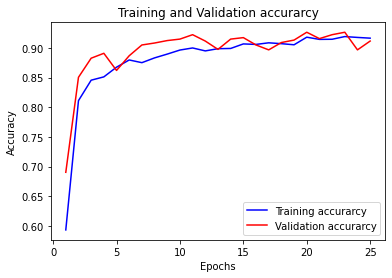

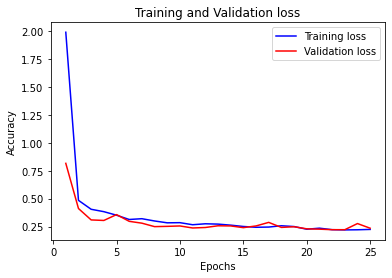

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [55]:
from tensorflow.keras.models import load_model
saved_model = load_model('best_model_BW_25.h5')

score,accuracy,precision,recall = saved_model.evaluate(X_test,y_test,verbose=1)
print("Test loss is {}".format(score))
print("Test accuracy is {}".format(accuracy))
print("Test Precision is {}".format(precision))
print("Test Recall is {}".format(recall))
f1 = (2*(precision*recall))/(precision+recall)
print("Test f1_score is {}".format(f1))

64/64 [==============================] - 2s 32ms/step - loss: 0.2309 - accuracy: 0.9202 - precision_1: 0.9279 - recall_1: 0.9122
Test loss is 0.23087015748023987
Test accuracy is 0.9201784729957581
Test Precision is 0.9278870224952698
Test Recall is 0.9122459292411804
Test f1_score is 0.9200000013784464


In [9]:
from tensorflow.keras.models import load_model
saved_model = load_model('best_model_BW_25.h5')

score,accuracy,precision,recall = saved_model.evaluate(X_train,y_train,verbose=1)
f1 = (2*(precision*recall))/(precision+recall)
print("Train loss is {}".format(score))
print("Train accuracy is {}".format(accuracy))
print("Train Precision is {}".format(precision))
print("Train Recall is {}".format(recall))
print("Train f1_score is {}".format(f1))

190/190 [==============================] - 10s 51ms/step - loss: 0.1802 - accuracy: 0.9385 - precision_1: 0.9445 - recall_1: 0.9309
Train loss is 0.18024146556854248
Train accuracy is 0.9385225772857666
Train Precision is 0.9445003271102905
Train Recall is 0.9309204816818237
Train f1_score is 0.9376612388431859


In [56]:
prediction = saved_model.predict(X)[:,1].tolist()
print(len(prediction))

8068


In [57]:
prediction__class = np.argmax(saved_model.predict(X), axis=-1)
print(prediction__class)

[0 0 0 ... 4 4 4]


In [58]:
df["BW_Predition_25"] = prediction__class

In [ ]:
from tensorflow.keras.utils import plot_model
visible1 = (64,64,1)
model = Sequential()
model.add(Conv2D(128, (5, 5),input_shape=visible1,activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))   
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(128,activation='relu'))          
model.add(Dense(5,activation='softmax'))
model.summary()
plot_model(model, to_file='convolutional_neural_network.png')

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy', keras.metrics.Precision(),  keras.metrics.Recall()],
             )

In [29]:
import time
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
start = time.perf_counter()
print(y_train.shape)

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)
mc = ModelCheckpoint('best_model_BW_50.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)


history=model.fit(X_train, y_train, batch_size=64, epochs=50, validation_split=0.2,shuffle=1, callbacks=[es, mc], class_weight=None)

elapsed = time.perf_counter() - start
print('Elapsed %.3f seconds.' % elapsed)

(6051, 5)
Epoch 1/50
76/76 [==============================] - ETA: 0s - loss: 1.5613 - accuracy: 0.5698 - precision_2: 0.6745 - recall_2: 0.4132
Epoch 00001: val_accuracy improved from -inf to 0.71924, saving model to best_model_BW_50.h5
76/76 [==============================] - 27s 359ms/step - loss: 1.5613 - accuracy: 0.5698 - precision_2: 0.6745 - recall_2: 0.4132 - val_loss: 0.6847 - val_accuracy: 0.7192 - val_precision_2: 0.7510 - val_recall_2: 0.6350
Epoch 2/50
76/76 [==============================] - ETA: 0s - loss: 0.6155 - accuracy: 0.7564 - precision_2: 0.8073 - recall_2: 0.6996
Epoch 00002: val_accuracy improved from 0.71924 to 0.83980, saving model to best_model_BW_50.h5
76/76 [==============================] - 28s 365ms/step - loss: 0.6155 - accuracy: 0.7564 - precision_2: 0.8073 - recall_2: 0.6996 - val_loss: 0.4516 - val_accuracy: 0.8398 - val_precision_2: 0.9400 - val_recall_2: 0.7506
Epoch 3/50
76/76 [==============================] - ETA: 0s - loss: 0.4649 - accuracy: 

Epoch 40/50
76/76 [==============================] - ETA: 0s - loss: 0.1746 - accuracy: 0.9335 - precision_2: 0.9370 - recall_2: 0.9287
Epoch 00040: val_accuracy did not improve from 0.93146
76/76 [==============================] - 26s 341ms/step - loss: 0.1746 - accuracy: 0.9335 - precision_2: 0.9370 - recall_2: 0.9287 - val_loss: 0.2277 - val_accuracy: 0.9232 - val_precision_2: 0.9259 - val_recall_2: 0.9182
Epoch 41/50
76/76 [==============================] - ETA: 0s - loss: 0.1538 - accuracy: 0.9430 - precision_2: 0.9475 - recall_2: 0.9395
Epoch 00041: val_accuracy did not improve from 0.93146
76/76 [==============================] - 26s 346ms/step - loss: 0.1538 - accuracy: 0.9430 - precision_2: 0.9475 - recall_2: 0.9395 - val_loss: 0.2411 - val_accuracy: 0.9191 - val_precision_2: 0.9249 - val_recall_2: 0.9149
Epoch 42/50
76/76 [==============================] - ETA: 0s - loss: 0.1743 - accuracy: 0.9329 - precision_2: 0.9373 - recall_2: 0.9295
Epoch 00042: val_accuracy did not impr

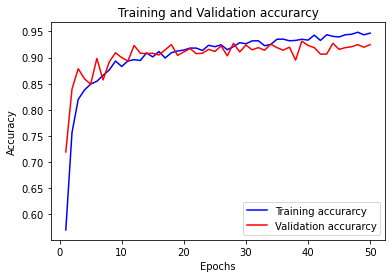

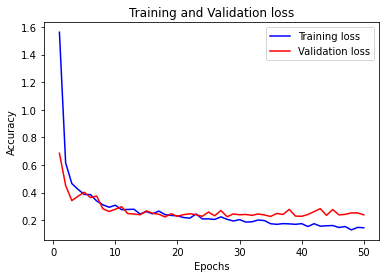

In [30]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [59]:
from tensorflow.keras.models import load_model
saved_model = load_model('best_model_BW_50.h5')

score,accuracy,precision,recall = saved_model.evaluate(X_test,y_test,verbose=1)
print("Test loss is {}".format(score))
print("Test accuracy is {}".format(accuracy))
print("Test Precision is {}".format(precision))
print("Test Recall is {}".format(recall))
f1 = (2*(precision*recall))/(precision+recall)
print("Test f1_score is {}".format(f1))

64/64 [==============================] - 2s 31ms/step - loss: 0.2330 - accuracy: 0.9222 - precision_2: 0.9302 - recall_2: 0.9177
Test loss is 0.23302441835403442
Test accuracy is 0.9221616387367249
Test Precision is 0.9301507472991943
Test Recall is 0.9176995754241943
Test f1_score is 0.9238832121628998


In [10]:
from tensorflow.keras.models import load_model
saved_model = load_model('best_model_BW_50.h5')

score,accuracy,precision,recall = saved_model.evaluate(X_train,y_train,verbose=1)
f1 = (2*(precision*recall))/(precision+recall)
print("Train loss is {}".format(score))
print("Train accuracy is {}".format(accuracy))
print("Train Precision is {}".format(precision))
print("Train Recall is {}".format(recall))
print("Train f1_score is {}".format(f1))

190/190 [==============================] - 9s 50ms/step - loss: 0.1212 - accuracy: 0.9640 - precision_2: 0.9670 - recall_2: 0.9598
Train loss is 0.12124121189117432
Train accuracy is 0.9639729261398315
Train Precision is 0.9670329689979553
Train Recall is 0.9598413705825806
Train f1_score is 0.9634237493282519


In [60]:
prediction = saved_model.predict(X)[:,1].tolist()
print(len(prediction))

8068


In [61]:
prediction__class = np.argmax(saved_model.predict(X), axis=-1)
print(prediction__class)

[0 0 0 ... 4 4 4]


In [62]:
df["BW_Predition_50"] = prediction__class

In [ ]:
from tensorflow.keras.utils import plot_model
visible1 = (64,64,1)
model = Sequential()
model.add(Conv2D(128, (5, 5),input_shape=visible1,activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))   
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(128,activation='relu'))          
model.add(Dense(5,activation='softmax'))
model.summary()
plot_model(model, to_file='convolutional_neural_network.png')

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy', keras.metrics.Precision(),  keras.metrics.Recall()],
             )

In [37]:
import time
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
start = time.perf_counter()
print(y_train.shape)

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)
mc = ModelCheckpoint('best_model_BW_150.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)


history=model.fit(X_train, y_train, batch_size=64, epochs=150, validation_split=0.2,shuffle=1, callbacks=[es, mc], class_weight=None)

elapsed = time.perf_counter() - start
print('Elapsed %.3f seconds.' % elapsed)

(6051, 5)
Epoch 1/150
76/76 [==============================] - ETA: 0s - loss: 1.9071 - accuracy: 0.4822 - precision_3: 0.6098 - recall_3: 0.2329
Epoch 00001: val_accuracy improved from -inf to 0.72172, saving model to best_model_BW_150.h5
76/76 [==============================] - 23s 298ms/step - loss: 1.9071 - accuracy: 0.4822 - precision_3: 0.6098 - recall_3: 0.2329 - val_loss: 0.7393 - val_accuracy: 0.7217 - val_precision_3: 0.9120 - val_recall_3: 0.4707
Epoch 2/150
76/76 [==============================] - ETA: 0s - loss: 0.7028 - accuracy: 0.7107 - precision_3: 0.7987 - recall_3: 0.6130
Epoch 00002: val_accuracy improved from 0.72172 to 0.80925, saving model to best_model_BW_150.h5
76/76 [==============================] - 22s 287ms/step - loss: 0.7028 - accuracy: 0.7107 - precision_3: 0.7987 - recall_3: 0.6130 - val_loss: 0.5300 - val_accuracy: 0.8092 - val_precision_3: 0.9149 - val_recall_3: 0.6746
Epoch 3/150
76/76 [==============================] - ETA: 0s - loss: 0.5808 - accur

Epoch 20/150
76/76 [==============================] - ETA: 0s - loss: 0.2346 - accuracy: 0.9124 - precision_3: 0.9214 - recall_3: 0.9035
Epoch 00020: val_accuracy improved from 0.91495 to 0.91660, saving model to best_model_BW_150.h5
76/76 [==============================] - 32s 426ms/step - loss: 0.2346 - accuracy: 0.9124 - precision_3: 0.9214 - recall_3: 0.9035 - val_loss: 0.2445 - val_accuracy: 0.9166 - val_precision_3: 0.9237 - val_recall_3: 0.9100
Epoch 21/150
76/76 [==============================] - ETA: 0s - loss: 0.2214 - accuracy: 0.9184 - precision_3: 0.9258 - recall_3: 0.9095
Epoch 00021: val_accuracy improved from 0.91660 to 0.91990, saving model to best_model_BW_150.h5
76/76 [==============================] - 32s 425ms/step - loss: 0.2214 - accuracy: 0.9184 - precision_3: 0.9258 - recall_3: 0.9095 - val_loss: 0.2526 - val_accuracy: 0.9199 - val_precision_3: 0.9236 - val_recall_3: 0.9083
Epoch 22/150
76/76 [==============================] - ETA: 0s - loss: 0.2285 - accuracy:

Epoch 40/150
76/76 [==============================] - ETA: 0s - loss: 0.1862 - accuracy: 0.9262 - precision_3: 0.9327 - recall_3: 0.9225
Epoch 00040: val_accuracy did not improve from 0.92320
76/76 [==============================] - 32s 426ms/step - loss: 0.1862 - accuracy: 0.9262 - precision_3: 0.9327 - recall_3: 0.9225 - val_loss: 0.2571 - val_accuracy: 0.9116 - val_precision_3: 0.9232 - val_recall_3: 0.9034
Epoch 41/150
76/76 [==============================] - ETA: 0s - loss: 0.1655 - accuracy: 0.9368 - precision_3: 0.9399 - recall_3: 0.9304
Epoch 00041: val_accuracy did not improve from 0.92320
76/76 [==============================] - 33s 433ms/step - loss: 0.1655 - accuracy: 0.9368 - precision_3: 0.9399 - recall_3: 0.9304 - val_loss: 0.2466 - val_accuracy: 0.9133 - val_precision_3: 0.9182 - val_recall_3: 0.9083
Epoch 42/150
76/76 [==============================] - ETA: 0s - loss: 0.1805 - accuracy: 0.9335 - precision_3: 0.9386 - recall_3: 0.9279
Epoch 00042: val_accuracy did not i

Epoch 60/150
76/76 [==============================] - ETA: 0s - loss: 0.1344 - accuracy: 0.9494 - precision_3: 0.9519 - recall_3: 0.9448
Epoch 00060: val_accuracy did not improve from 0.92568
76/76 [==============================] - 33s 432ms/step - loss: 0.1344 - accuracy: 0.9494 - precision_3: 0.9519 - recall_3: 0.9448 - val_loss: 0.2639 - val_accuracy: 0.9249 - val_precision_3: 0.9261 - val_recall_3: 0.9216
Epoch 61/150
76/76 [==============================] - ETA: 0s - loss: 0.1315 - accuracy: 0.9492 - precision_3: 0.9516 - recall_3: 0.9463
Epoch 00061: val_accuracy did not improve from 0.92568
76/76 [==============================] - 32s 418ms/step - loss: 0.1315 - accuracy: 0.9492 - precision_3: 0.9516 - recall_3: 0.9463 - val_loss: 0.3164 - val_accuracy: 0.9017 - val_precision_3: 0.9066 - val_recall_3: 0.8976
Epoch 62/150
76/76 [==============================] - ETA: 0s - loss: 0.1310 - accuracy: 0.9508 - precision_3: 0.9544 - recall_3: 0.9467
Epoch 00062: val_accuracy did not i

Epoch 80/150
76/76 [==============================] - ETA: 0s - loss: 0.1171 - accuracy: 0.9550 - precision_3: 0.9590 - recall_3: 0.9531
Epoch 00080: val_accuracy did not improve from 0.92568
76/76 [==============================] - 32s 422ms/step - loss: 0.1171 - accuracy: 0.9550 - precision_3: 0.9590 - recall_3: 0.9531 - val_loss: 0.3777 - val_accuracy: 0.8927 - val_precision_3: 0.8974 - val_recall_3: 0.8885
Epoch 81/150
76/76 [==============================] - ETA: 0s - loss: 0.1086 - accuracy: 0.9589 - precision_3: 0.9602 - recall_3: 0.9568
Epoch 00081: val_accuracy did not improve from 0.92568
76/76 [==============================] - 32s 423ms/step - loss: 0.1086 - accuracy: 0.9589 - precision_3: 0.9602 - recall_3: 0.9568 - val_loss: 0.3057 - val_accuracy: 0.9108 - val_precision_3: 0.9158 - val_recall_3: 0.9075
Epoch 82/150
76/76 [==============================] - ETA: 0s - loss: 0.1001 - accuracy: 0.9636 - precision_3: 0.9660 - recall_3: 0.9616
Epoch 00082: val_accuracy did not i

Epoch 100/150
76/76 [==============================] - ETA: 0s - loss: 0.0879 - accuracy: 0.9676 - precision_3: 0.9691 - recall_3: 0.9665
Epoch 00100: val_accuracy did not improve from 0.92568
76/76 [==============================] - 35s 461ms/step - loss: 0.0879 - accuracy: 0.9676 - precision_3: 0.9691 - recall_3: 0.9665 - val_loss: 0.3379 - val_accuracy: 0.9092 - val_precision_3: 0.9089 - val_recall_3: 0.9067
Epoch 101/150
76/76 [==============================] - ETA: 0s - loss: 0.0864 - accuracy: 0.9719 - precision_3: 0.9727 - recall_3: 0.9715
Epoch 00101: val_accuracy did not improve from 0.92568
76/76 [==============================] - 34s 452ms/step - loss: 0.0864 - accuracy: 0.9719 - precision_3: 0.9727 - recall_3: 0.9715 - val_loss: 0.3648 - val_accuracy: 0.8976 - val_precision_3: 0.8980 - val_recall_3: 0.8943
Epoch 102/150
76/76 [==============================] - ETA: 0s - loss: 0.1092 - accuracy: 0.9585 - precision_3: 0.9616 - recall_3: 0.9560
Epoch 00102: val_accuracy did no

Epoch 120/150
76/76 [==============================] - ETA: 0s - loss: 0.0749 - accuracy: 0.9733 - precision_3: 0.9737 - recall_3: 0.9717
Epoch 00120: val_accuracy did not improve from 0.92568
76/76 [==============================] - 30s 401ms/step - loss: 0.0749 - accuracy: 0.9733 - precision_3: 0.9737 - recall_3: 0.9717 - val_loss: 0.3912 - val_accuracy: 0.9059 - val_precision_3: 0.9086 - val_recall_3: 0.9026
Epoch 121/150
76/76 [==============================] - ETA: 0s - loss: 0.0691 - accuracy: 0.9754 - precision_3: 0.9768 - recall_3: 0.9748
Epoch 00121: val_accuracy did not improve from 0.92568
76/76 [==============================] - 29s 380ms/step - loss: 0.0691 - accuracy: 0.9754 - precision_3: 0.9768 - recall_3: 0.9748 - val_loss: 0.3980 - val_accuracy: 0.9067 - val_precision_3: 0.9081 - val_recall_3: 0.9059
Epoch 122/150
76/76 [==============================] - ETA: 0s - loss: 0.0647 - accuracy: 0.9754 - precision_3: 0.9760 - recall_3: 0.9746
Epoch 00122: val_accuracy did no

Epoch 140/150
76/76 [==============================] - ETA: 0s - loss: 0.0642 - accuracy: 0.9783 - precision_3: 0.9791 - recall_3: 0.9779
Epoch 00140: val_accuracy did not improve from 0.92568
76/76 [==============================] - 23s 306ms/step - loss: 0.0642 - accuracy: 0.9783 - precision_3: 0.9791 - recall_3: 0.9779 - val_loss: 0.3869 - val_accuracy: 0.9133 - val_precision_3: 0.9161 - val_recall_3: 0.9108
Epoch 141/150
76/76 [==============================] - ETA: 0s - loss: 0.0628 - accuracy: 0.9762 - precision_3: 0.9768 - recall_3: 0.9752
Epoch 00141: val_accuracy did not improve from 0.92568
76/76 [==============================] - 23s 299ms/step - loss: 0.0628 - accuracy: 0.9762 - precision_3: 0.9768 - recall_3: 0.9752 - val_loss: 0.4823 - val_accuracy: 0.9001 - val_precision_3: 0.9030 - val_recall_3: 0.8993
Epoch 142/150
76/76 [==============================] - ETA: 0s - loss: 0.0751 - accuracy: 0.9767 - precision_3: 0.9770 - recall_3: 0.9754
Epoch 00142: val_accuracy did no

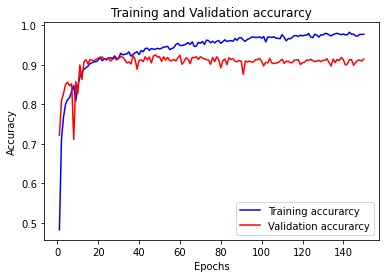

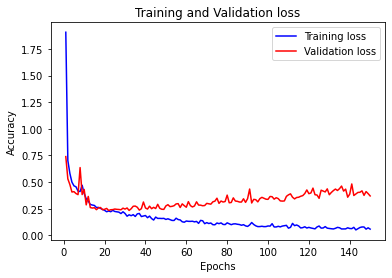

In [38]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [63]:
from tensorflow.keras.models import load_model
saved_model = load_model('best_model_BW_150.h5')

score,accuracy,precision,recall = saved_model.evaluate(X_test,y_test,verbose=1)
print("Test loss is {}".format(score))
print("Test accuracy is {}".format(accuracy))
print("Test Precision is {}".format(precision))
print("Test Recall is {}".format(recall))
f1 = (2*(precision*recall))/(precision+recall)
print("Test f1_score is {}".format(f1))

64/64 [==============================] - 2s 32ms/step - loss: 0.2701 - accuracy: 0.9187 - precision_3: 0.9228 - recall_3: 0.9132
Test loss is 0.2701006829738617
Test accuracy is 0.918691098690033
Test Precision is 0.9228456616401672
Test Recall is 0.913237452507019
Test f1_score is 0.9180164172305122


In [11]:
from tensorflow.keras.models import load_model
saved_model = load_model('best_model_BW_150.h5')

score,accuracy,precision,recall = saved_model.evaluate(X_train,y_train,verbose=1)
f1 = (2*(precision*recall))/(precision+recall)
print("Train loss is {}".format(score))
print("Train accuracy is {}".format(accuracy))
print("Train Precision is {}".format(precision))
print("Train Recall is {}".format(recall))
print("Train f1_score is {}".format(f1))

190/190 [==============================] - 10s 52ms/step - loss: 0.1144 - accuracy: 0.9635 - precision_3: 0.9664 - recall_3: 0.9603
Train loss is 0.11436181515455246
Train accuracy is 0.9634771347045898
Train Precision is 0.9664061069488525
Train Recall is 0.9603371620178223
Train f1_score is 0.963362076361825


In [64]:
prediction = saved_model.predict(X)[:,1].tolist()
print(len(prediction))

8068


In [65]:
prediction__class = np.argmax(saved_model.predict(X), axis=-1)
print(prediction__class)

[2 0 0 ... 4 4 4]


In [66]:
df["BW_Predition_150"] = prediction__class

In [67]:
df.to_csv("E:/Meat_Excels/MeatCutPredictions.csv")